# Handwritten Digit Recognition using Neural Networks

### Overview

In this project, we will train a neural network on the MNIST dataset to identify handwritten digits. 

### Importing and splitting the dataset
in the following cell, we will import the dataset and split it into training, testing and validation datasets



In [27]:
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# change batchsize here
batchSize = 64

train_size = int(0.6 * len(mnist_dataset))
val_size = int(0.2 * len(mnist_dataset))
test_size = len(mnist_dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(mnist_dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=batchSize, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batchSize, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batchSize, shuffle=False)


### Training
In the following cell we will import the Neural network module and initialize it

In [28]:
import torch.nn as nn
import torch.optim as optim

class NeuralNetwork(nn.Module):
    def __init__(self):

        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


#### Bonus

In [ ]:
# class CNN(nn.Module):
#     def __init__(self):
#         super(CNN, self).__init__()
#         self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
#         self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
#         self.fc1 = nn.Linear(64*7*7, 128)
#         self.fc2 = nn.Linear(128, 10)
#         self.relu = nn.ReLU()
#         self.dropout = nn.Dropout(0.5)
#         self.pool = nn.MaxPool2d(2, 2)

#     def forward(self, x):
#         x = self.pool(self.relu(self.conv1(x)))
#         x = self.pool(self.relu(self.conv2(x)))
#         x = x.view(-1, 64*7*7)
#         x = self.relu(self.fc1(x))
#         x = self.dropout(x)
#         x = self.fc2(x)
#         return x


In the next cell we will define the loss function (cross-entropy), and optimizer (stochastic gradient descend).

In [29]:
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


Here we will create a function to train the Network

In [30]:
import torch
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs):
    TrainLoss = []
    ValLoss = []
    TrainAcc = []
    ValAcc = []
    for epoch in range(epochs):
        train_loss = 0
        train_correct = 0
        total_train = 0
        model.train()
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            
            # Calculate training accuracy
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            train_correct += (predicted == labels).sum().item()
        
        train_accuracy = 100 * train_correct / total_train
        TrainAcc.append(train_accuracy)

        val_loss = 0
        val_correct = 0
        total_val = 0
        model.eval()
        with torch.no_grad():
            for images, labels in val_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                
                # Calculate validation accuracy
                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        
        val_accuracy = 100 * val_correct / total_val
        ValAcc.append(val_accuracy)
        
        print(f"Epoch {epoch+1}, Train Loss: {train_loss/len(train_loader):.4f}, Val Loss: {val_loss/len(val_loader):.4f}, Train Acc: {train_accuracy:.2f}%, Val Acc: {val_accuracy:.2f}%")
        TrainLoss.append(train_loss/len(train_loader))
        ValLoss.append(val_loss/len(val_loader))
        
    return TrainLoss, ValLoss, TrainAcc, ValAcc

Epochs = 10
epochs = range(1, Epochs+1)
train_losses, val_losses, train_accuracies, val_accuracies = train_model(model, train_loader, val_loader, criterion, optimizer, epochs=Epochs)





Epoch 1, Train Loss: 1.4769, Val Loss: 0.6736, Train Acc: 59.12%, Val Acc: 79.03%
Epoch 2, Train Loss: 0.4992, Val Loss: 0.4244, Train Acc: 85.94%, Val Acc: 87.97%
Epoch 3, Train Loss: 0.3822, Val Loss: 0.3808, Train Acc: 88.81%, Val Acc: 88.87%
Epoch 4, Train Loss: 0.3435, Val Loss: 0.3339, Train Acc: 89.81%, Val Acc: 90.55%
Epoch 5, Train Loss: 0.3206, Val Loss: 0.3208, Train Acc: 90.51%, Val Acc: 90.79%
Epoch 6, Train Loss: 0.3036, Val Loss: 0.3090, Train Acc: 91.09%, Val Acc: 90.83%
Epoch 7, Train Loss: 0.2891, Val Loss: 0.3034, Train Acc: 91.60%, Val Acc: 91.12%
Epoch 8, Train Loss: 0.2756, Val Loss: 0.2853, Train Acc: 91.96%, Val Acc: 91.75%
Epoch 9, Train Loss: 0.2623, Val Loss: 0.2646, Train Acc: 92.33%, Val Acc: 92.38%
Epoch 10, Train Loss: 0.2506, Val Loss: 0.2695, Train Acc: 92.77%, Val Acc: 91.99%


### Analysis
in the following cells we will plot diagrams to analyse the model. The very next cell plots the training and validation loss.

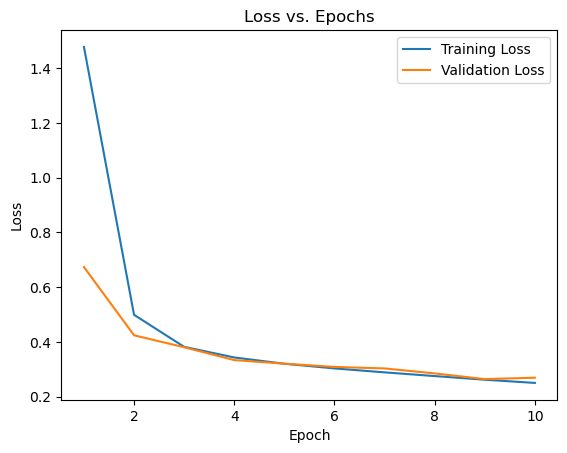

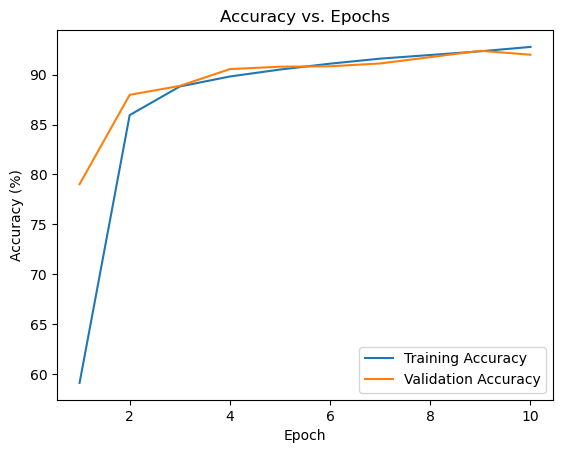

In [31]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()


In the next cell we will test the model on the test data and plot the acuuracy as epochs increase.